# Homework 6: Least Squares

## 1.Hovercraft rendezvous.

a).  
The variables in this question are the Position(X), Velocity(V) and Thrust(U) of both Alice and Bob at each second.  
Constraints:  
$x_{t+1} = x_t +\frac{1}{3600}v_t \\ v_{t+1} = v_t + u_t \\ x_{Alice,t=1} =(0,0), x_{Bob,t=1} = (0.5,0) \\ v_{Alice,t=1} = (0,20),  v_{Bob,t=1} = (30,0) \\ x_{Alice,t=60} = x_{Bob,t=60}$

Objective: 
$Minimize\{\sum_{t=1}^{60}||u_t^A|| ^2+ ||u_t^B|| ^2\}$

In [1]:
using JuMP, Gurobi;

As an explanation: the first two columns stand for the X,V and U of Alice, while the last two stand for these of Bob!

In [2]:

m1a = Model((Gurobi.Optimizer));
set_silent(m1a);
X = @variable(m1a, [1:60, 1:4]);
V = @variable(m1a, [1:60, 1:4]);
U = @variable(m1a, [1:60, 1:4]);
@constraint(m1a, X[1,:] .== [0,0,0.5,0]);
@constraint(m1a, V[1,:] .== [0,20,30,0]);

for i = 2:60
    @constraint(m1a, X[i,:] .== X[i-1,:] + V[i-1,:] / 3600);
    @constraint(m1a, V[i,:].== V[i-1,:] + U[i-1,:]);
end

@constraint(m1a, X[60,1:2] .== X[60,3:4]);
@objective(m1a, Min, sum(U.^2));
optimize!(m1a);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


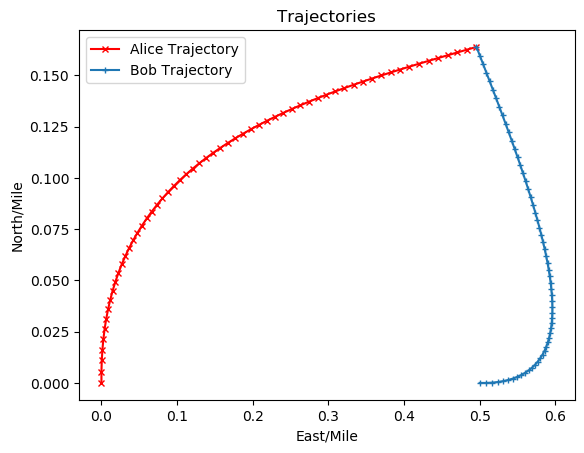

In [3]:
using PyPlot;
figure();
plot(value.(X[:,1]), value.(X[:,2]), label = "Alice Trajectory", marker = "x", ms = 5, "r");
plot(value.(X[:,3]), value.(X[:,4]), label = "Bob Trajectory", marker = "+", ms = 5);
xlabel("East/Mile");
ylabel("North/Mile");
title("Trajectories");
legend();


In [4]:
println("Final Location of Alice: ",round.(value.(X[60,1:2]),digits =6));
println("Final Location of Bob: ", round.(value.(X[60,3:4]),digits = 6));
println("Final Velocity of Alice: ",round.(value.(V[60,1:2]),digits =6));
println("Final Velocity of Bob: ", round.(value.(V[60,3:4]),digits = 6));

Final Location of Alice: [0.495833, 0.163889]
Final Location of Bob: [0.495833, 0.163889]
Final Velocity of Alice: [45.769231, 4.871795]
Final Velocity of Bob: [-15.769231, 15.128205]


Yes, they rendezvous at the 60th seconds.

b).  
Additional constraint:  
$v_{Bob, t = 60} = v_{Alice, t= 60}$

In [5]:
m1b = Model((Gurobi.Optimizer));
set_silent(m1b);
Xb = @variable(m1b, [1:60, 1:4]);
Vb = @variable(m1b, [1:60, 1:4]);
Ub = @variable(m1b, [1:60, 1:4]);

@constraint(m1b, Xb[1,:] .== [0,0,0.5,0]);
@constraint(m1b, Vb[1,:] .== [0,20,30,0]);
@constraint(m1b, Vb[60,1:2] .== Vb[60, 3:4]);

for i = 2:60
    @constraint(m1b, Xb[i,:] .== Xb[i-1,:] + Vb[i-1,:] / 3600);
    @constraint(m1b, Vb[i,:].== Vb[i-1,:] + Ub[i-1,:]);
end

@constraint(m1b, Xb[60,1:2] .== Xb[60,3:4]);
@objective(m1b, Min, sum(Ub.^2));
optimize!(m1b);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


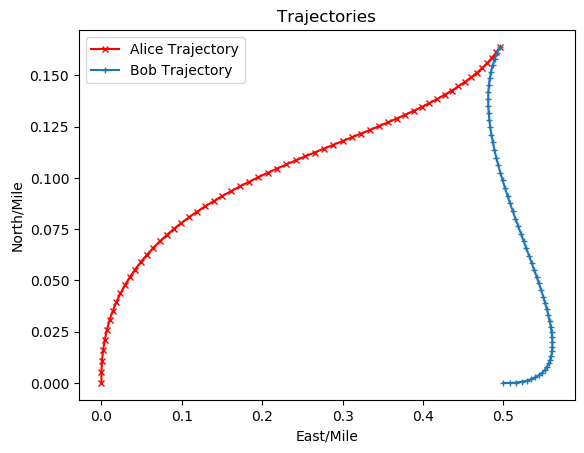

In [6]:
using PyPlot;
figure();
plot(value.(Xb[:,1]), value.(Xb[:,2]), label = "Alice Trajectory", marker = "x", ms = 5, c = "r");
plot(value.(Xb[:,3]), value.(Xb[:,4]), label = "Bob Trajectory",marker = "+", ms = 5);
xlabel("East/Mile");
ylabel("North/Mile");
title("Trajectories");
legend();

The trajectories looks different from that in question a), as Alice and Bob are supposed to have the same velocity at the 60th second.

In [7]:
println("Final Location of Alice: ",round.(value.(Xb[60,1:2]),digits =6));
println("Final Location of Bob: ", round.(value.(Xb[60,3:4]),digits = 6));
println("Final Velocity of Alice: ",round.(value.(Vb[60,1:2]),digits =6));
println("Final Velocity of Bob: ", round.(value.(Vb[60,3:4]),digits = 6));

Final Location of Alice: [0.495833, 0.163889]
Final Location of Bob: [0.495833, 0.163889]
Final Velocity of Alice: [15.0, 10.0]
Final Velocity of Bob: [15.0, 10.0]


In [8]:
println("The meeting locations are ->");
println("In a). $(value.(X[60,1:2])); in b). $(value.(Xb[60,1:2]))")
println("\n\nIs their meeting location same as that in question a).?");
print(round.(value.(Xb[60,:]), digits = 6) == round.(value.(X[60,:]), digits = 6));

The meeting locations are ->
In a). [0.4958333333333333, 0.16388888888888892]; in b). [0.4958333333333335, 0.16388888888888883]


Is their meeting location same as that in question a).?
true

## 2.Quadratic form positivity.

a).The original constraint is  
$2x^2 + 2y^2 + 9z^2 + 8xy - 6xz - 6yz \le1$  
In the matrix form, we have:  
$v^\top Q v \le 1$, $Q$ is symmetric;  
$v = \begin{pmatrix} x \\ y \\z \end{pmatrix}$  
$Q = \begin{pmatrix} 2 & 4 & -3\\ 4 & 2 & -3 \\ -3 & -3 & 9 \end{pmatrix}$  

b).

In [9]:
using LinearAlgebra;
Q = [2 4 -3; 4 2 -3; -3 -3 9];
(L,U) = eigen(Q);
## L is  eigen values
## U is orthogonal matrix

In [10]:
(diagm(L))

3×3 Array{Float64,2}:
 -2.0  0.0   0.0
  0.0  3.0   0.0
  0.0  0.0  12.0

Here we can see one of these eigen values is negative, so $Q>0$ cannot be met. In other words, suppose we have a vector v, we can never ensure that $v^\top Qv \le b$ is an ellipsoid. But however, to have an ellipsoid,  the constraint $ Q > 0$ should always be satisfied. So this problem is not convex.

c).

$||Av||^2 -||Bv||^2 = v^\top A^\top Av -  v^\top B^\top Bv = v^\top (A^\top A - B^\top B)v = v^\top Qv \\ 
Q = A^\top A - B^\top B $  
$A^\top A $ and $ B^\top B $  are both semipositive matrices.  
Let's take a look at $Q$:
$Q = ULU^\top \\
Q = ULU^\top = U \left\{\begin{pmatrix} 0 & 0 & 0 \\ 0 & 3 & 0 \\0 & 0 & 12 \end{pmatrix} - \begin{pmatrix} 2 & 0 & 0 \\ 0 & 0 & 0 \\0 & 0 & 0\end{pmatrix}\right \} U^\top$  
Hence, we can just make $U\begin{pmatrix} 0 & 0 & 0 \\ 0 & 3 & 0 \\0 & 0 & 12 \end{pmatrix}U^\top = A^\top A $ and $U\begin{pmatrix} 2 & 0 & 0 \\ 0 & 0 & 0 \\0 & 0 & 0\end{pmatrix}U^\top = B^\top B $  
$A = U\begin{pmatrix} 0 & 0 & 0 \\ 0 & \sqrt{3} & 0 \\0 & 0 & \sqrt{12} \end{pmatrix}U^\top  \\ B = U\begin{pmatrix} \sqrt{2} & 0 & 0 \\ 0 & 0 & 0 \\0 & 0 & 0\end{pmatrix}U^\top $  

In [11]:
(L,U) = eigen(Q);
L1 = Array(L);
L1[1] = 0;
L1 = L1 .^0.5;
L2 = zeros(3);
L2[1] = (-L[1])^0.5;


In [12]:
A = U*diagm(L1)*U';
B = U*diagm(L2)*U';

In [13]:
println("So the matrix A is ->")
for i = 1:3
    println(round.(A[i,:], digits = 6));
end

So the matrix A is ->
[1.154701, 1.154701, -0.57735]
[1.154701, 1.154701, -0.57735]
[-0.57735, -0.57735, 2.886751]


In [14]:
println("So the matrix B is ->")
for i = 1:3
    println(round.(B[i,:], digits = 6));
end

So the matrix B is ->
[0.707107, -0.707107, 0.0]
[-0.707107, 0.707107, 0.0]
[0.0, -0.0, 0.0]


In [15]:
Q_new = A'* A - B' * B

3×3 Array{Float64,2}:
  2.0   4.0  -3.0
  4.0   2.0  -3.0
 -3.0  -3.0   9.0

In [16]:
print("The bias between the original Q and reconstructed Q is ->", sum((Q - Q_new).^2));
print("\nSo A'A - B'B is equavalent to Q.");

The bias between the original Q and reconstructed Q is ->8.38164711797325e-29
So A'A - B'B is equavalent to Q.

d).

Now we have L, the eigen values. If we can find a vector $x$, where $x^\top diag(L) x \le 1$, no matter how large the x is, the constraint 1 can still be satisfied. (E.g. One $x$ that meet this requirement is $(2\sqrt{3}, 2,1)$).  
$x = U^\top v \\
v = (U^\top)^{-1}x$  
Then we can get the direction $v$.
Let's talk on x instead of v first;  
$-2x_1^2 + 3x_2^2 + 12x_3^2 \le 1 \\
x_1^2 \ge 1.5x_2^2 + 6x_3^2 - 0.5$  
As long as we can find such x, we can get the v vector by the equation above;  
JUst use $x = (2\sqrt{3}, 2,1)$ as an example;

In [17]:
x = Array([2*3^0.5; 2; 1]);
v = inv(U') * x;
v /= norm(v)

3-element Array{Float64,1}:
  0.21501775468273507
 -0.9731592968892739 
 -0.08202650821026695

Now we have already get a direction that meet the question's requirement. Let us check if this corret:

In [18]:
LogAmp = (-1:10);
for i = 1:length(LogAmp)
    Amp = 10.0^LogAmp[i];
    v_new = Amp*v;
    val = v'*Q*v;
    println("The length of the vector is $(Amp), and the value of v'Qv is $(round(val, digits = 6)); \nConstraint_1 is $(val <= 1)\n");    
end

The length of the vector is 0.1, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 10.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 100.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1000.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 10000.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 100000.0, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0e6, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0e7, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0e8, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0e9, and the value of v'Qv is 0.0; 
Constraint_1 is true

The length of the vector is 1.0

So we can see this question became unbounded, and vector v can be arbitarily large;

## 3. Lasso regression.

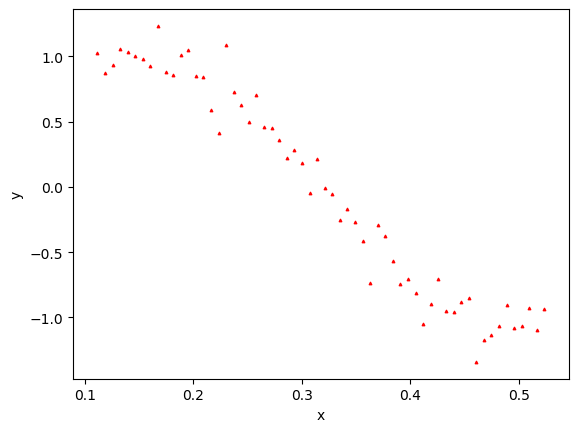

In [19]:
using CSV, PyPlot;
data = CSV.read("lasso_data.csv");

X = data[:,1];
Y = data[:,2];
figure();
scatter(X,Y, c = "r", marker = "^", s = 3);
xlabel("x");
ylabel("y");


In [20]:
## making plot coordinates and match them with data X
N =50; ## number of points in the curve
X_plot = [i for i = 0:(N-1)] /(N-1) * 0.6 .+ 0.0;
#X_plot = [i for i = 0:(N-1)] /(N-1);
#X_plot *= maximum(X) - minimum(X);
#X_plot .+=  minimum(X);

a).

This question is an oridinary polynomial regression problem.  
 The objective is to minimize the mean square error between the data sets and the fitted curve. 
 The variables are the polynomial coefficients, a;  
 $f(x) = \sum_{i=0}^d a_ix^i \\
 Argmin(\sum_{j = 1}^N (y_j - f(x_j))^2)$  
 $x_j,y_j$ are the data. $a_i$ is the $i_{th}$ order polynomial coefficient.

In [21]:
using JuMP, Ipopt,Gurobi;


In [22]:
function getPoly(X,order)
    X_poly_matrix = zeros(length(X), order+1);
    for i = 1:order+1
        X_poly_matrix[:,i] = X.^(i-1);
    end
    return X_poly_matrix;    
end

getPoly (generic function with 1 method)

In [23]:
#m3a = Model(with_optimizer(Ipopt.Optimizer));
m3a = Model((Gurobi.Optimizer));
#m3a =Model(solver=GurobiSolver(OutputFlag=0))
#m3a = Model((Ipopt.Optimizer));
set_silent(m3a);

order_set = [5;15];
X = data[:,1];
Y = data[:,2];

Y_fitted_a = zeros(length(X_plot),length(order_set)); ## The first col is that of d = 5 and the next  col is d = 15;
Y_cal_m = zeros(length(X),length(order_set));


for i = 1:length(order_set) 
    
    
    order = order_set[i];

    X_poly = getPoly(X ,order);
    a = @variable(m3a, [1:(order+1)]);
    res = @variable(m3a, [1:length(X)]);
    @constraint(m3a, res .== (X_poly*a - Y));  
    
    @objective(m3a, Min, sum((res).^2)/length(res));   
    optimize!(m3a);
    
    println("\n\nThe polynomial coefficients are (from 0 order to higher order) ->\n",value.(a));
    println("The MSE of this fitting is -> ", JuMP.objective_value(m3a));
    X_plot_poly = getPoly(X_plot , order);
    Y_fitted_a[:,i] = X_plot_poly* value.(a);    

end

Academic license - for non-commercial use only
Academic license - for non-commercial use only


The polynomial coefficients are (from 0 order to higher order) ->
[0.3898950228186052, 5.73720250742401, 16.757282067608376, -254.1413141784733, 495.93298795464165, -247.3873075245843]
The MSE of this fitting is -> 0.01689988349314956


The polynomial coefficients are (from 0 order to higher order) ->
[-1.3371916887438686, 44.09937448383822, -287.2753991632128, 702.1306625632528, 43.02222722083481, -2474.6072012925233, -2081.9158690588442, 6513.438388120847, 19011.301841247314, 11806.302499387548, -50425.52808207874, -158788.32258178963, -134174.10117745004, 446232.08246814396, 1.5000969599329894e6, -2.1377115245777923e6]
The MSE of this fitting is -> 0.016843199493316422


Comments: For the 5 degree polynomial, that coefficients are larger than the first several coefficients which represent the lower orders. However, the corfficients of the higher orders in the 15 degree one, are extremely large.

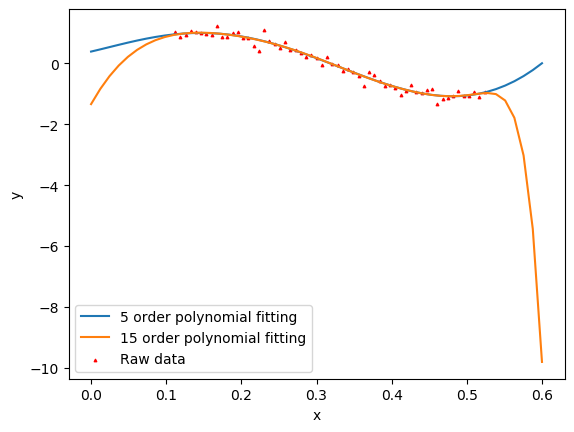

In [24]:
using PyPlot;
figure();
scatter(X,Y, c = "r", marker = "^", s = 3, label = "Raw data");
for i = 1:length(order_set)
    #plot(X, Y_cal_m[:,i], label = "$(order_set[i]) order polynomial fitting");
    plot(X_plot, Y_fitted_a[:,i], label = "$(order_set[i]) order polynomial fitting");
end
xlabel("x");
ylabel("y");
legend();


b).

$f(x) = \sum_{i=0}^d a_ix^i \\
 Argmin(\sum_{j = 1}^N (y_j - f(x_j))^2 + \lambda||a||_2)$  
 $x_j,y_j$ are the data. $a_i$ is the $i_{th}$ order polynomial coefficient.

In [25]:
m3b = Model((Gurobi.Optimizer));
set_silent(m3b);
order_set = [15];
X = data[:,1];
Y = data[:,2];

Y_fitted_b = zeros(length(X_plot),length(order_set)); ## The first col is that of d = 5 and the next  col is d = 15;
Y_cal_m = zeros(length(X),length(order_set));

for i = 1:length(order_set)
    order = order_set[i];
    lambda = 1e-6;
    X_poly = getPoly(X,order);

    a = @variable(m3b, [1:(order+1)]);

    res = @variable(m3b, [1:length(X)]);


    @constraint(m3b, res .== (X_poly*a - Y));

    #@constraint(m3a, a[1] == 510)


    @objective(m3b, Min, (sum(res.^2) .+ lambda* sum(a.^2))/length(res));
    optimize!(m3b);    
    println("\n\nThe polynomial coefficients are (from 0 order to higher order) ->\n",value.(a));
    println("The MSE of this fitting is -> ", JuMP.objective_value(m3b));
    X_plot_poly = getPoly(X_plot, order);
    Y_fitted_b[:,i] =X_plot_poly* value.(a);
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only


The polynomial coefficients are (from 0 order to higher order) ->
[-0.06959121026110433, 15.382605672726102, -58.101276280265864, 15.600902791711446, 42.66479311077873, 32.187682625787325, 14.70853460939357, 2.6232773791303785, -3.0550949512270953, -4.621193261888788, -4.253387473429799, -3.2668796167989376, -2.2752868059767515, -1.4894064090330597, -0.9341257282504349, -0.5678886618431788]
The MSE of this fitting is -> 0.01703881579449471


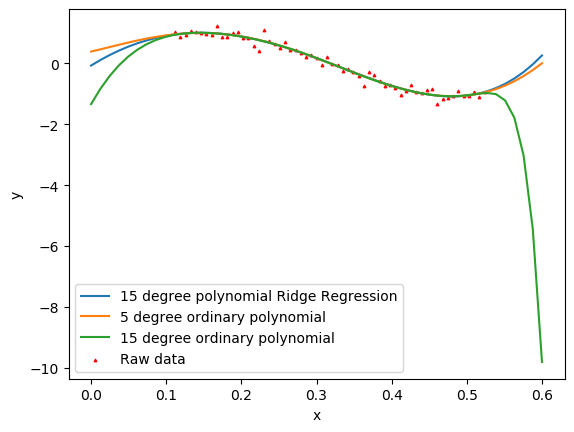

In [26]:
figure();
scatter(X,Y, c = "r", marker = "^", s = 3, label = "Raw data");
for i = 1:length(order_set)
    #plot(X, Y_cal_m[:,i], label = "$(order_set[i]) order polynomial fitting");
    plot(X_plot, Y_fitted_b[:,i], label = "$(order_set[i]) degree polynomial Ridge Regression");
end
plot(X_plot, Y_fitted_a[:,1], label = "5 degree ordinary polynomial");
plot(X_plot, Y_fitted_a[:,2], label = "15 degree ordinary polynomial");
xlabel("x");
ylabel("y");
legend();

The $l_2$ regularization makes the 15 degree polynimial fitting more similar to the 5 degree ordinary polynomial fitting. When comparing it with 15 degree ordinary polynomial fitting, its polynomial coefficients for higher orders become much smaller,but its Mean Square Error is greater.

c).

In [27]:
m3c = Model((Gurobi.Optimizer));
set_silent(m3c);
order_set = [15];
X = data[:,1];
Y = data[:,2];

lambda_lasso = [10.0^i for i = 1:-1:-9];

Y_fitted_c = zeros(length(X_plot),length(lambda_lasso)); ## The first col is that of d = 5 and the next  col is d = 15;
Y_cal_m = zeros(length(X),length(order_set));

N_non_zeros = zeros(length(lambda_lasso));
MSE = zeros(length(lambda_lasso));


for i = 1:length(lambda_lasso)
    order = 15;
    lambda = lambda_lasso[i];
    X_poly = getPoly(X,order);

    a = @variable(m3c, [1:order+1]);

    res = @variable(m3c, [1:length(X)]);


    @constraint(m3c, res .== X_poly*a - Y);
    
    abs_a = @variable(m3c, [1:order+1]);
    @constraint(m3c,abs_a .>= a);
    @constraint(m3c,abs_a .>= -a);

    @objective(m3c, Min, (sum(res.^2) + lambda* sum(abs_a))/length(res));
    optimize!(m3c);    
    
    X_plot_poly = getPoly(X_plot, order);
    l1_a = value.(a);
    
    non_zeros = length(l1_a);
    for j = 1:length(l1_a)
        if abs(l1_a[j]) <= 1e-5
            l1_a[j] = 0.0;
            non_zeros -= 1;
        end
    end
    println("\n\nLasso lambda = $(round(lambda,digits = 9))\nThe polynomial coefficients are (from 0 order to higher order)->\n",round.(l1_a,digits = 9));
    println("The MSE of this fitting is -> ", JuMP.objective_value(m3c));
    MSE[i] = JuMP.objective_value(m3c);
    N_non_zeros[i] = non_zeros;
    
    Y_fitted_c[:,i] = X_plot_poly* l1_a;
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only


Lasso lambda = 10.0
The polynomial coefficients are (from 0 order to higher order)->
[0.0, -0.145968309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The MSE of this fitting is -> 0.6461937018639613


Lasso lambda = 1.0
The polynomial coefficients are (from 0 order to higher order)->
[1.77910438, -5.687325981, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The MSE of this fitting is -> 0.1750848492565986


Lasso lambda = 0.1
The polynomial coefficients are (from 0 order to higher order)->
[2.001351189, -6.363357977, -4.5876e-5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The MSE of this fitting is -> 0.05635106518216829


Lasso lambda = 0.01
The polynomial coefficients are (from 0 order to higher order)->
[1.228589368, 1.506285549, -18.581905803, 0.0, 0.0, 49.271865995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The 

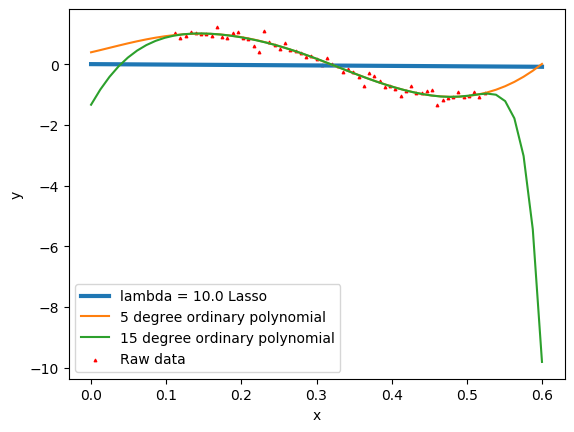

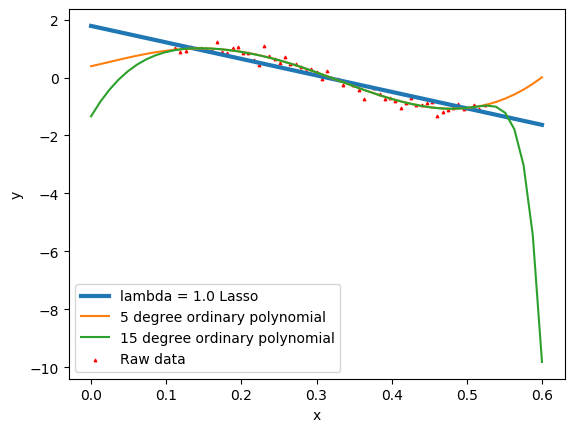

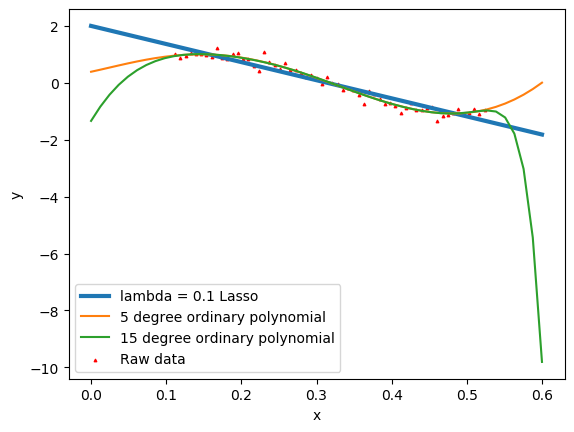

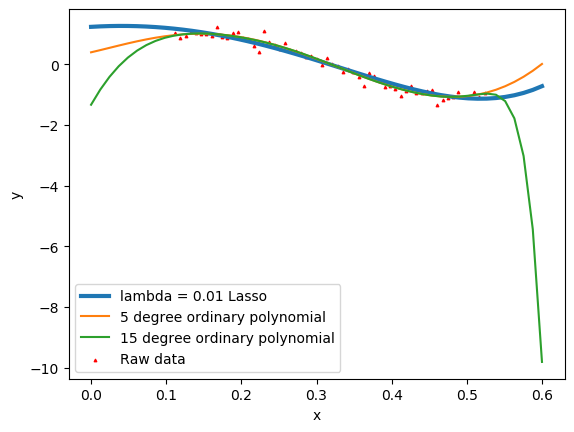

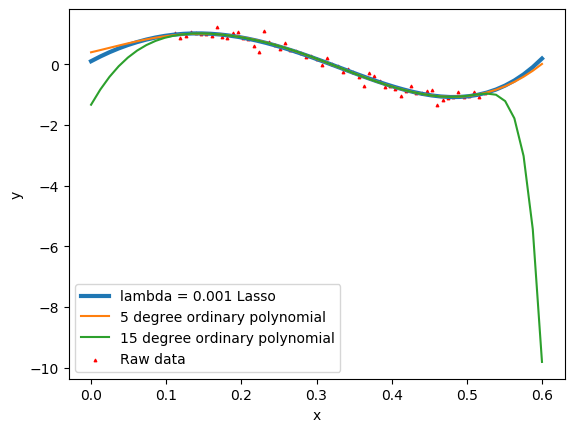

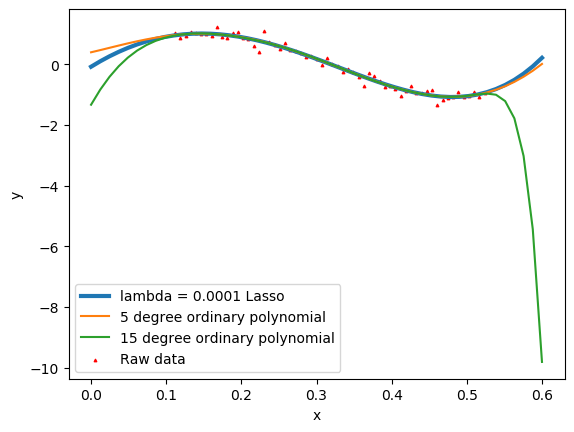

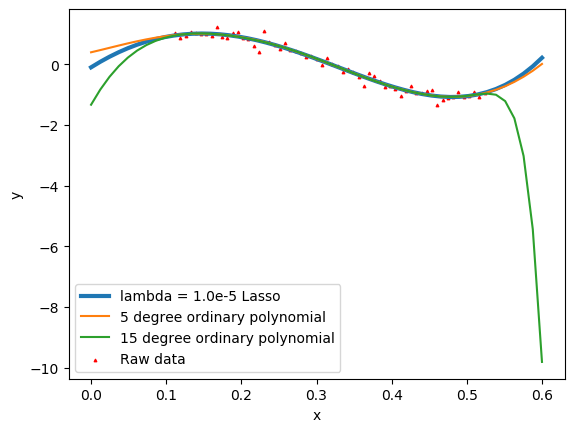

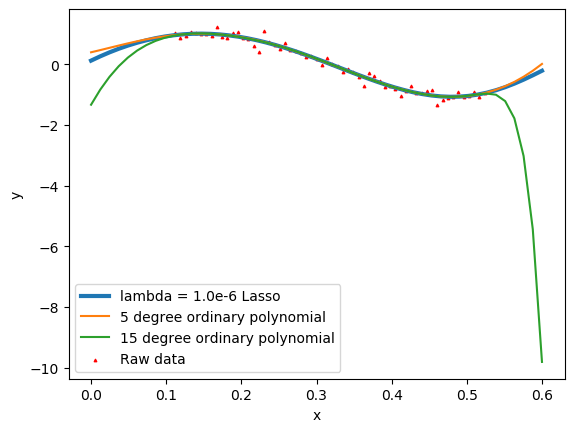

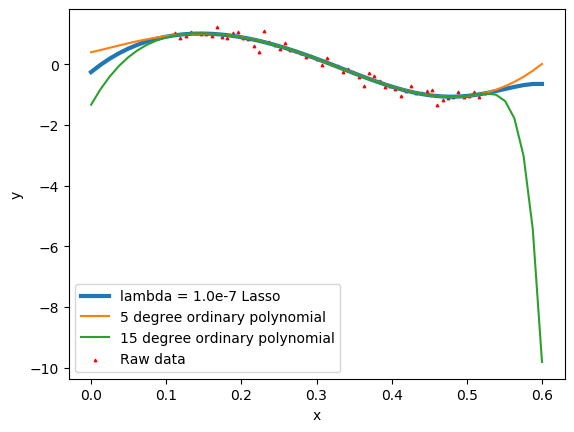

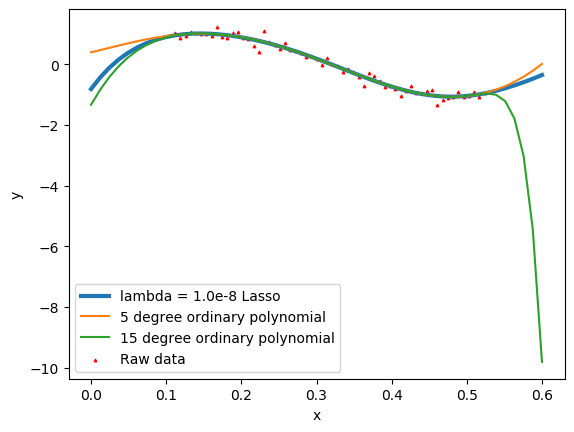

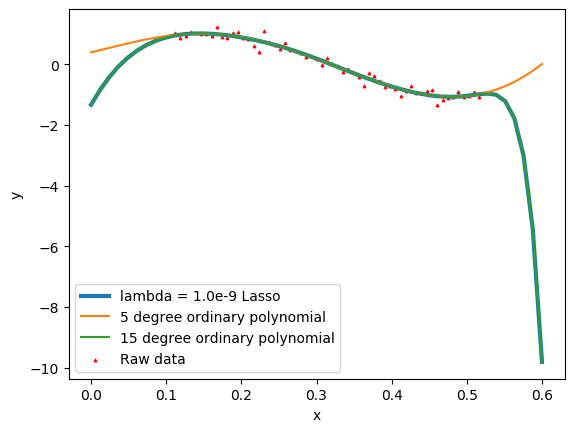

In [28]:

for i = 1:length(lambda_lasso)
    figure();
    
    #plot(X, Y_cal_m[:,i], label = "$(order_set[i]) order polynomial fitting");
    plot(X_plot, Y_fitted_c[:,i], label = "lambda = $(round(lambda_lasso[i],digits = 10)) Lasso", linewidth = 3);
    plot(X_plot, Y_fitted_a[:,1], label = "5 degree ordinary polynomial");
    plot(X_plot, Y_fitted_a[:,2], label = "15 degree ordinary polynomial");
    
    scatter(X,Y, c = "r", marker = "^", s = 3, label = "Raw data");
    xlabel("x");
    ylabel("y");
    legend();
end



From these plots we can see when $\lambda$ is greater than 0.01, the fitting is not good. Most polynomial parameters are zeros, thus the lasso fitting curve looks very straight. Meanwhile, when $\lambda$ is smaller than $10^{-7}$, the fitting curve looks very similar to the ordinary 15 degree polynomial fitting, so it doesn't simplify the model.   
A $\lambda$ equal to $10^{-3}$ may be a good value. In this scenario, the lasso curve looks like 5 degree ordinary polynomial fitting, representing that this model effectively simplified our model to a lower degree one.

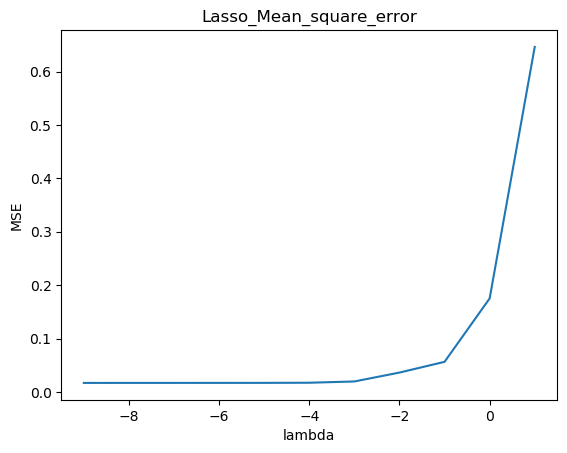

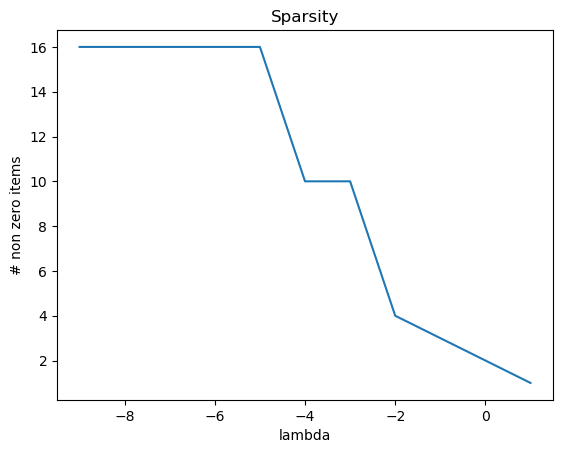

In [29]:
figure();
plot(log10.(lambda_lasso), MSE);
xlabel("lambda");
ylabel("MSE");
title("Lasso_Mean_square_error")
figure();
plot(log10.(lambda_lasso), N_non_zeros);
xlabel("lambda");
ylabel("# non zero items");
title("Sparsity");